In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as scp
import sympy as sy

In [2]:
#  The idea here is that if we can project the 'future direction' more or less within the next 5 timesteps (or somethin like that)
#  then if we put a boundry above and below what we expect the predicted linear growth to be,
#  and buy each time the 'actual' price crosses up on the botom or middle, and sell each time it 
#  crosses up or down the top, then we will be making money.  Also, if we still have money, we sell on the bottom or middle
#  crossings down too, so we never should have money coming out the bottom of what we predict the stock will do.
#  If it turns out that 

In [3]:
t = np.linspace(0,5,200)
x = np.random.random(200)

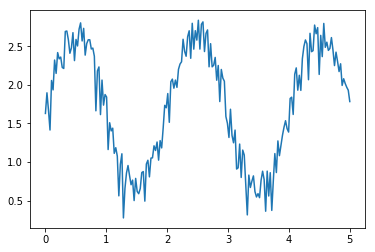

In [4]:
x = np.random.random(200)
stock = lambda t: np.sin(t*np.pi)+np.sin((np.pi)/3)+x**.3
plt.plot(t,stock(t))
plt.show()

In [51]:
func_vec = [np.sin]
func_vec[0](np.pi)

1.2246467991473532e-16

In [53]:
pol = np.polynomial.polynomial.Polynomial([1,1,1])
pol(1)

3.0

In [54]:
thing = np.vectorize(np.sin)
thing(np.linspace(0,5,5))

array([ 0.        ,  0.94898462,  0.59847214, -0.57156132, -0.95892427])

In [55]:
# create a 'fake stock' class - give it a length, and two integers
# (number of points you would like, number of sinosoidal terms, and degree of linear terms involved) 
# and it produces a vector of length n that approximates a 'noisy' vector that has 'some pattern' incorporated.
# It would be cool to pull from cos(x)**(2.4 or something) between -pi/2 and pi/2 and put that number into tangent
# and use that final output as reasonable coefficients for the stuff
#  which distribution would I use?  beta?  Also, perhaps I could use the ifft to create the 'sinosoidal'
#  part of the funciton.

In [56]:
class fake_stock():
    '''
    # (number of points you would like, number of sinosoidal terms, and degree of linear terms involved) 
    # and it produces a vector of length n that approximates a 'noisy' vector that has 'some pattern' incorporated.
    # It would be cool to pull from cos(x)**(2.4 or something) between -pi/2 and pi/2 and put that number into tangent
    # and use that final output as reasonable coefficients for the stuff
    '''
    def __init__(self,numvals,num_poly_terms,num_sin_terms):
        '''
        numvals is the number of values in the data
        poly_coef_vec is the vector that contains the polynomial's coefficient values
        sin_phase_vec is the vector that contains the sin terms' phase values (phi)
        sin_freq_vec is the vector that contains the sin term's frequency values (w)
        sin_amp_vec is the vector that contains the sin term's amplitude values (A)
        (recall that the genric sin function is A*sin(w*t+phi))
        '''
        self.numvals = numvals
        self.poly_coef_vec = np.random.random((num_poly_terms))
        self.sin_phase_vec = np.random.random((num_sin_terms))*2*np.pi
        self.sin_freq_vec = np.random.random((num_sin_terms))
        self.sin_amp_vec = np.random.random((num_sin_terms))
        
        # poly containes the polynomial terms of the fake stock
        self.poly = np.polynomial.polynomial.Polynomial(self.poly_coef_vec)
        # noise_vals contains the noise of the stock
        self.noise_vals = np.random.random((self.numvals))
        
        function = np.vectorize(self.poly)
        
        stuff = function(np.linspace(0,self.numvals,self.numvals))
        self.vector = stuff/np.max(stuff)#+self.noise_vals
        

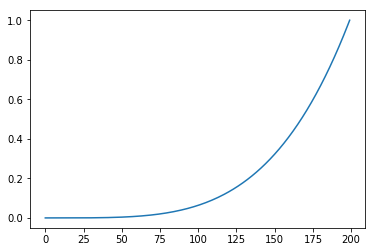

poly([0.01170245 0.17348089 0.73101568 0.00719157 0.71008796])


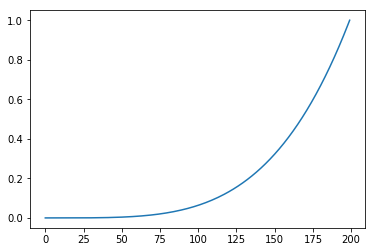

poly([0.73365957 0.00628961 0.07115877 0.03498698 0.10865418])


In [57]:
f = fake_stock(200,5,0)
plt.plot(f.vector)
plt.show()
print(f.poly)

f.poly=np.polynomial.polynomial.Polynomial([1])
f = fake_stock(200,5,0)
plt.plot(f.vector)
plt.show()
print(f.poly)

In [58]:
def find_next_segment_mean(datapoints,segment_size):
    '''takes in a vector called datapoints and integer segment size.  
    Consider using scipy.optimize.curve_fit in order to fit the past segments to a few models (linear, )

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-58-d6477cc5a16d>, line 3)

In [59]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

Amplitude=0.9810632724805054, Angular freq.=1.9994827897525729, phase=0.4374924842778151, offset=4.042371434493602, Max. Cov.=0.013830715484823198


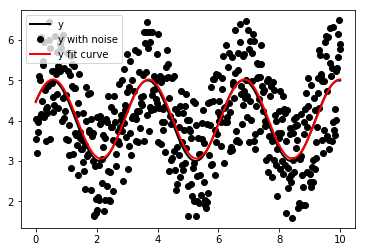

In [60]:
import pylab as plt

N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3
#N, amp, omega, phase, offset, noise = 50, 1., .4, .5, 4., .2
#N, amp, omega, phase, offset, noise = 200, 1., 20, .5, 4., 1
tt = numpy.linspace(0, 10, N)
tt2 = numpy.linspace(0, 10, 10*N)
yy = amp*numpy.sin(omega*tt + phase) + offset
yynoise = yy + noise*(numpy.random.random(len(tt))-0.5)

res = fit_sin(tt, yynoise)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, yynoise, "ok", label="y with noise")
plt.plot(tt2, res["fitfunc"](tt2), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

No handles with labels found to put in legend.


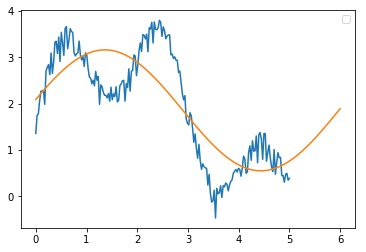

No handles with labels found to put in legend.


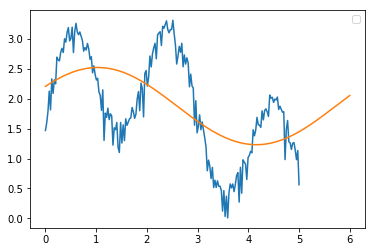

In [85]:
t = np.linspace(0,5,200)
t2 = np.linspace(0,6,200)
x = np.random.random(200)
stock = lambda t: np.sin((np.pi)/3)+x**.3+np.sin(t*np.pi)+1.5*np.sin(t)
res1 = fit_sin(t, stock(t))
plt.plot(t,stock(t))
plt.plot(t2, res1["fitfunc"](t2))
plt.legend(loc="best")
plt.show()

# we will change the amplitude on the last term by .01

t = np.linspace(0,5,200)
t2 = np.linspace(0,6,200)
x = np.random.random(200)
stock = lambda t: np.sin((np.pi)/3)+x**.3+np.sin(t*np.pi)+.79*np.sin(t)
res1 = fit_sin(t, stock(t))
plt.plot(t,stock(t))
plt.plot(t2, res1["fitfunc"](t2))
plt.legend(loc="best")
plt.show()

In [62]:
# We can see that the function will get the right first order trends, but that it may be advantageous
# To add other trends as well, or potentially look only at the other trends  Is there a 
# metric that exists or that we can make to see how much of each of the values we would 
# want to encorporate?

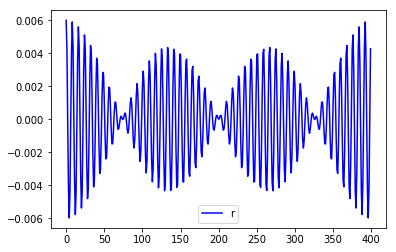

In [63]:
import matplotlib.pyplot as plt
t = np.arange(400)
n = np.zeros((400,), dtype=complex)
n[48:52] = [1,.2,.2,1]#np.exp(1j*np.random.uniform(0, 2*np.pi, (0,)))
s = np.fft.ifft(n)
plt.plot(t, s.real, 'b-')
plt.legend(('real'))
plt.show()

No handles with labels found to put in legend.


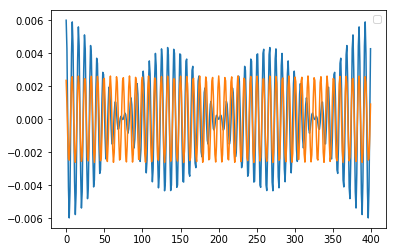

In [67]:
res1 = fit_sin(t, s.real)
plt.plot(t,s.real)
plt.plot(t, res1["fitfunc"](t))
plt.legend(loc="best")
plt.show()

In [83]:
squares = []
for x in range(5):
    squares.append(lambda n=x: n**2)

funs = [0,1,2]
for num in range(3):
    funs.append(lambda x=num: np.sin(0)+x)
    print(num)

t = np.linspace(5,10)
plt.plot(funs[0](t))
plt.show()
plt.plot(funs[1](t))
plt.show()
plt.plot(funs[2](t))
plt.show()

0
1
2


TypeError: 'int' object is not callable

In [ ]:
A*sin(w*x)+t